# Ques 1 : Discuss the scenarios where multithreading is preferable to multiprocessing and scenarios where multiprocessing is a better choice.

### Ans 1 : 

Multithreading and multiprocessing come under memory processing. In Multiprocessing, process runs parallely on multiple processors and in Multithreading, process runs concurrently on multiple threads in a processor. 

Multithreading is preferable in scenarios where program involves input-outout (I/O) bound  tasks, i.e reading or writing files, database operations , because threads can efficiently handle these types of tasks by utilizing the time spent waiting for I/O operations. Global Interpreter Lock (GIL) in Python limits the ability to run CPU bound tasks in parallel with threads but I/O bound tasks benefit from concurrency of Multithreading. Example- Downloading, managing multiple tabs on browser, managing I/O for multiple network clients, like handling requests to a web server.

Multiprocessing is good for CPU bound tasks. Suitable for tasks that are independent and can run isolation  Python's multiprocessing module creates seperate processes, each with its own memory space and  truly parallel on multiple CPU cores (no GIL). Example- running large mathematical computations, server handling, image processing tasks like resizing or filtering multiple images in parallel.


# Ques 2 : Describe what a process pool is and how it helps in managing multiple processes efficiently.

### Ans 2 :

Process pool is a collection of worker processes that can be reused to execute tasks concurrently.By controlling the distribution of tasks among processes and avoiding the overhead of continuously establishing and destroying processes, it enables effective parallel execution. 

It helps manage multiple processes efficiently by:  
1. By reusing processes, it avoids the overhead of creating and destroying processes repeatedly. 
2. Distributing tasks among available processes to optimize resource usage. 
3. Providing a high-level interface to parallelize tasks without managing individual processes. 


# Ques 3 :  Explain what multiprocessing is and why it is used in Python programs.

### Ans 3 :

Multiprocessing refers to the process runs parelally on multiple processors. Each process has its own memory space and resources which are isolated from other process. 
This is particularly useful for CPU bound task since Python's GIL limits parallel execution of theeads for such tasks. By using seperate processes, GIL is circumvented and true parallelism is achieved. 

It is used to improve performance for CPU bound tasks by taking advantage of multiple CPU cores. It is suitable for tasks that are independent and can run isolation. Example- running large mathematical computations, server handling, image processing tasks like resizing or filtering multiple images in parallel.

# Ques 4 : Write a Python program using multithreading where one thread adds numbers to a list, and another thread removes numbers from the list. Implement a mechanism to avoid race conditions using threading.Lock.

### Ans 4 :

In [1]:
import time
import threading      # python module
num = []
lock = threading.Lock()       # lock to prevent race conditions
def add_num():
    for i in range(10):
        time.sleep(0.1)
        with lock:
            num.append(i)
            print(f"Added{i}")
            
def remove_num():
    for i in range(10):
        time.sleep(0.15)
        with lock:
            if num:
                removed = num.pop(0)
                print(f"Removed {removed}")

# run the program on two threads
thread1 = threading.Thread(target=add_num)
thread2 = threading.Thread(target=remove_num)
# to start the threads
thread1.start()
thread2.start()
# join first executed these thread1, thread2 and then main thread will be executed
thread1.join()
thread2.join()
print("Final list:", num)

Added0
Removed 0
Added1
Removed 1
Added2
Added3
Removed 2
Added4
Removed 3
Added5
Added6
Removed 4
Added7
Removed 5
Added8
Added9
Removed 6
Removed 7
Removed 8
Removed 9
Final list: []


# Ques 5 : Describe the methods and tools available in Python for safely sharing data between threads and processes.

### Ans 5 :

For Threads : 
1. threading.Lock(): Ensures that only one thread can access a shared resource at a time, preventing race conditions. The lock ensures that only one thread can modify shared_list at a time, avoiding inconsistent states due to concurrent modifications.
2. queue.Queue(): Thread-safe data structure for communication between threads that automatically handles locking when multiple threads access it. 
3. we will use multithreading to add and remove elements from a shared list, using functions that take arguments.


In [1]:
import threading
import queue
q = queue.Queue()   # create a FIFO queue

def producer():
    for i in range(5):
        q.put(i)
        print(f"produced {i}")
    q.put(None)   # signal consumers to stop

def consumer():
    while True:
        good = q.get()
        if good is None:
            break
        print(f"consumed {good}")
        q.task_done()
        
# create producer and consumer threads
producer_thread = threading.Thread(target=producer)
consumer_thread = threading.Thread(target=consumer)
# to start the threads
producer_thread.start()
consumer_thread.start()
# Wait for the producer to finish
producer_thread.join()

# Wait for the consumer to finish
consumer_thread.join()

print("All tasks are done.")

produced 0
produced 1
produced 2
produced 3
produced 4
consumed 0
consumed 1
consumed 2
consumed 3
consumed 4
All tasks are done.


In [3]:
import time
import threading
start = time.perf_counter()

def test_func(args):
    print('do something')
    print(f"sleep for {args} sec")
    time.sleep(args)
    print('done with sleeping')
    
threads = []
for i in range(5):
    t = threading.Thread(target = test_func, args = [2])
    t.start()
    threads.append(t)

for thread in threads:
    thread.join()
end = time.perf_counter()
print(f"the program finished in {round(end-start, 2)} seconds")

do something
sleep for 2 sec
do something
sleep for 2 sec
do something
sleep for 2 sec
do something
sleep for 2 sec
do something
sleep for 2 sec
done with sleeping
done with sleeping
done with sleeping
done with sleeping
done with sleeping
the program finished in 2.04 seconds


For Processes:

1. multiprocessing.Queue: Allows safe communication between processes.Each process can add or retrieve data from the queue safely, even though they do not share the same memory.
2. multiprocessing.Value and multiprocessing.Array: Provide shared memory for primitive types and arrays, allowing multiple processes to safely modify shared data. 
   Value allows sharing an integer counter between processes, and it automatically ensures synchronization to prevent race conditions.


# Ques 6 :  Discuss why it’s crucial to handle exceptions in concurrent programs and the techniques available for doing so.

### Ans 6 :

In python, an exception is an event that occurs during program execution that disrupts the regular flow of code.
Handling exceptions in concurrent programs is essential to ensure robustness and reliability. By using try-except blocks, custom handlers, concurrent.futures, logging, and queue.Queue, you can effectively manage exceptions and maintain the stability of your application. 
Proper exception handling ensures that errors are caught and managed gracefully, allowing the program to continue functioning or fail safely.

Techniques for handling exceptions:

Use try-except blocks inside the target function to catch exceptions.


In [1]:
import threading
def test_func():
    try:
        result = 10 / 0      # it will raise a zero division error
    except ZeroDivisionError as e:
        print(f"Exception caught: {e}")
        
thread = threading.Thread(target=test_func)
thread.start()
thread.join()

Exception caught: division by zero


Logging exception helps in debugging and monitoring the application

In [2]:
import threading
import logging

logging.basicConfig(level=logging.ERROR)
def test_func():
    try:
        result = 10 / 0      # it will raise a zero division error
    except ZeroDivisionError as e:
        logging.error(f"Exception caught: {e}")
        
thread = threading.Thread(target=test_func)
thread.start()
thread.join()

ERROR:root:Exception caught: division by zero


Putting exception handling in a function

In [3]:
def test(file):
    try:
        f = open(file, 'r')
        f.read()
    except FileNotFoundError as e:
        print(f"My file was not found {e}")

In [4]:
test("ex.txt")

My file was not found [Errno 2] No such file or directory: 'ex.txt'


# Ques 7 :  Create a program that uses a thread pool to calculate the factorial of numbers from 1 to 10 concurrently. Use concurrent.futures.ThreadPoolExecutor to manage the threads. 

### Ans 7 :

In Python, the concurrent.futures.ThreadPoolExecutor is a high-level interface for managing and working with thread pools. 
A thread pool allows multiple threads to execute tasks concurrently, improving performance in scenarios where tasks can run in parallel.This helps to manage concurrency more efficiently, particularly when many tasks need to run at the same time.

In [6]:
from concurrent.futures import ThreadPoolExecutor
import math
def factorial(n):
    return math.factorial(n)
num = [1,2,3,4,5,6,7,8,9,10]

# create a thread pool and calculate factorials concurrently
with ThreadPoolExecutor() as executor:
    results = executor.map(factorial, num)

# print the result
for num, result in zip(num, results):
    print(f"Factorial of {num} is {result}")

Factorial of 1 is 1
Factorial of 2 is 2
Factorial of 3 is 6
Factorial of 4 is 24
Factorial of 5 is 120
Factorial of 6 is 720
Factorial of 7 is 5040
Factorial of 8 is 40320
Factorial of 9 is 362880
Factorial of 10 is 3628800


##### factorial(n) : takes number n and calculates its factorial using python's math.factorial().
##### ThreadPoolExecutor() : create a thread pool to manage the threads.
##### executor.map(factorial, num) : this maps each numbers in the num list to the factorial function and executes them concurrently in different threads.

# Ques 8 : Create a Python program that uses multiprocessing.Pool to compute the square of numbers from 1 to 10 in parallel. Measure the time taken to perform this computation using a pool of different sizes (e.g., 2, 4, 8 processes).

In [ ]:
### Ans 8 :

from multiprocessing import Pool
import time

def square(x):
    return x * x

def compute_squares(pool_size):
    with Pool(pool_size) as p:
        start_time = time.time()
        results = p.map(square, range(1, 11))
        end_time = time.time()
        print(f"Pool size: {pool_size}, Time taken: {end_time - start_time:.4f} seconds")
        print(results)

if __name__ == '__main__':
    for size in [2, 4, 8]:
        compute_squares(size)

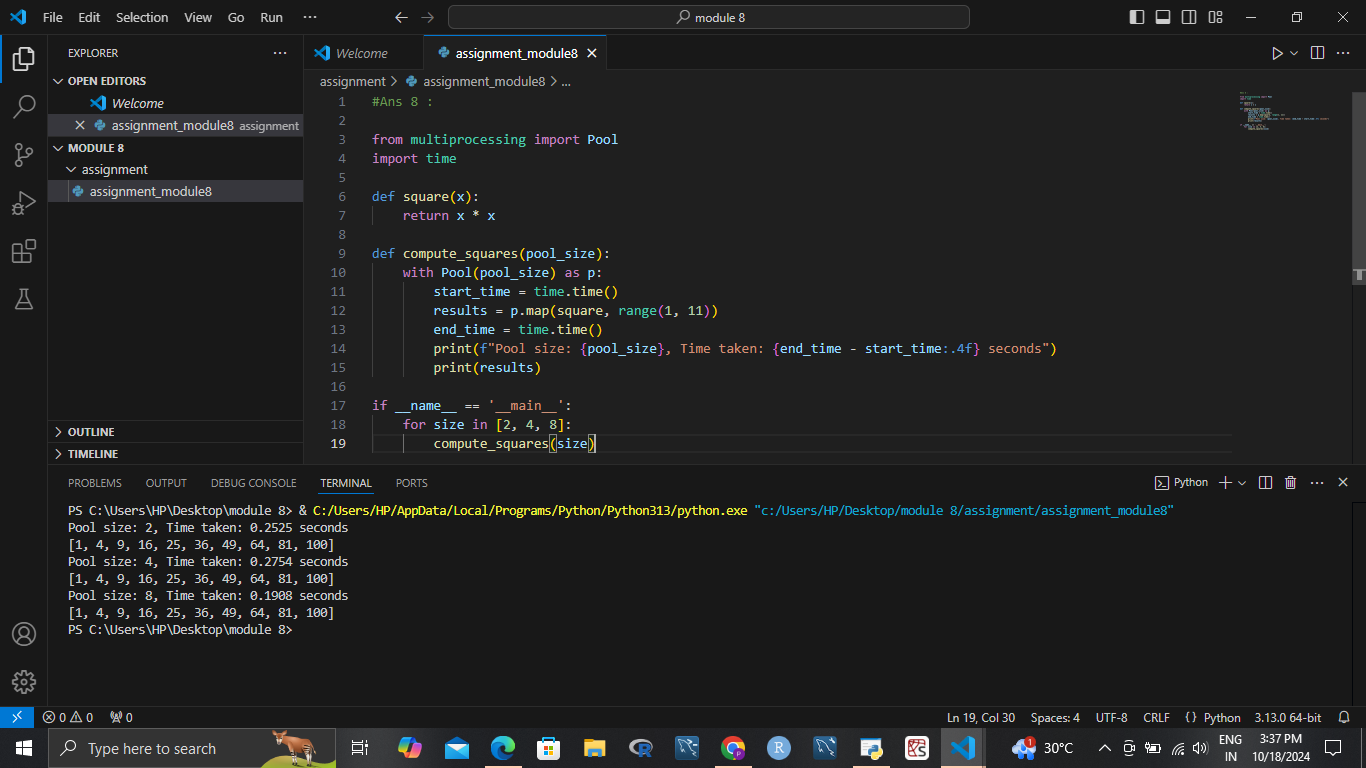